In [1]:
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from fake_useragent import UserAgent
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import re
from bs4 import BeautifulSoup
import requests
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

## Ideas

Get data about oscar wins
* 1. Extra data to predict how much I will like something with
* 2. Could build a model to predict which films will win each category in a given year

From the data I provide can determine my favorite actors and directors and then find similar movies that contain those actors/directors.

Get rating for each actor and director listed from the average rating of films they have been in; might also be interesting to have quartiles, max, min, sd of ratings for each actor and director. Also number of movies played by the actors and number of movies directed by the directors.  
* Actors popularity can vary wildly over time, and for example an excellent actor may have needed to take roles in many below-average films at the start of their careers to work their way to better films... how talented an actor actually is and how popular they are at that moment in time might be better predictors of film rating.

IMDB has demographics like separate mens and womens ratings and age breakdowns and distribution of ratings

## Collect all the film links

In [3]:
genre_dict = {
    "1": "action",
    "2": "animation",
    "4": "arts",
    "5": "classics",
    "6": "comedy",
    "8": "documentary",
    "9": "drama",
    "10": "horror",
    "11": "kids",
    "13": "mystery",
    "18": "romance",
    "14": "scifi"
}

In [46]:
for genre in genre_dict:
    print(genre,genre_dict[genre])
    #make browser
    ua=UserAgent()
    dcap = dict(DesiredCapabilities.PHANTOMJS)
    dcap["phantomjs.page.settings.userAgent"] = (ua.random)
    service_args=['--ssl-protocol=any','--ignore-ssl-errors=true']
    driver = webdriver.Chrome("D:/Documents/DataScience/Portfolio/films/films/chromedriver")

    all_movie = 'https://www.rottentomatoes.com/browse/dvd-streaming-all?minTomato=0&maxTomato=100&services=amazon;hbo_go;itunes;netflix_iw;vudu;amazon_prime;fandango_now&genres='+str(genre)+'&sortBy=tomato'
    driver.get(all_movie)
    webLink = 'https://www.rottentomatoes.com'
    movies = set()
    
    for i in range (0,60):
        try:
            #print(movies)
            showMoreButton = WebDriverWait(driver, 0.01).until(EC.presence_of_element_located((By.XPATH,'//*[@id="show-more-btn"]/button')))
            #click on the showMore Button
            showMoreButton.click()
            print('click: ',i, end="\r")
        except: None
            #print ('missing show More button')

    html=driver.page_source# get the html
    soup = BeautifulSoup(html, "lxml") # parse the html 
    all_movies=soup.findAll('div', {'class':re.compile('movie_info')}) # get all the review divs

    for x in all_movies:
        link=x.find('a',{'href':re.compile('/m/')})
        movLink = webLink + str(link).split('"')[1]
        #print(movLink)
        movies.add(str(movLink))    #creating the distinct list of movies
        
    try:
        fw=open(genre_dict[genre]+'.txt','w') # output file

        for x in movies:
            fw.write(x +"\n")

        fw.close()
    except:
        print("Error while trying to create movie_link.txt file")

1 action
2 animation
4 arts  20 18
5 classics7
6 comedy59 22 27 36
8 documentary2 22
9 drama 593
10 horror97
11 kids 59
13 mystery
18 romance 14 19
14 scifi59


## Explore all the links

In [2]:
#pageLink = action_link[0].replace('\n','')

def run(url):
  
    pageLink = url.replace('\n','')
    for i in range(0,5):
        try:
            response=requests.get(pageLink,headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36', } )        
            html=response.content
            break
        except Exception as e:# browser.open() threw an exception, the attempt to get the response failed
            None
    try:
        soup = BeautifulSoup(html.decode('ascii', 'ignore'),'html.parser') # parse the html
    except:
        print("Failed to get response for ",pageLink)
        return None
    #for i in range(0,5):
    try:
        description = soup.find('div', {'class':re.compile('movie_synopsis')}).text
    except:
        description = 'NA'
    #for i in range(0,5):
    try:
        box = soup.findAll('div', {'class':re.compile('meta-value')})
        rating = box[0].text

    except:
        rating = 'NA' 

    #for i in range(0,5):
    try:
        box4 = soup.findAll('div', {'class':re.compile('meta-value')})
        director_1 = box4[2].findAll(('a', {'href':re.compile('celebrity')}))
        director1 = director_1[0].text

    except:
        director1 =  'NA'    
    #for i in range(0,5):
    try:
        box5 = soup.findAll('div', {'class':re.compile('meta-value')})
        director_2 = box5[2].findAll(('a', {'href':re.compile('celebrity')}))
        director2 = director_2[1].text

    except:
        director2 = 'NA' 
    #for i in range(0,5):
    try:
        box6 = soup.findAll('div', {'class':re.compile('meta-value')})
        director_3 = box6[2].findAll(('a', {'href':re.compile('celebrity')}))
        director3 = director_3[2].text

    except:
        director3 = 'NA' 
    #for i in range(0,5):
    try:
        box7 = soup.findAll('div', {'class':re.compile('meta-value')})
        writer_1 = box7[3].findAll(('a', {'href':re.compile('celebrity')}))
        writer1 = writer_1[0].text

    except:
        writer1 = 'NA'    
    #for i in range(0,5):         
    try:
        box8 = soup.findAll('div', {'class':re.compile('meta-value')})
        writer_2 = box8[3].findAll(('a', {'href':re.compile('celebrity')}))
        writer2 = writer_2[1].text

    except:
        writer2 = 'NA'   
    #for i in range(0,5): 
    try:
        box9 = soup.findAll('div', {'class':re.compile('meta-value')})
        writer_3 = box9[3].findAll(('a', {'href':re.compile('celebrity')}))
        writer3 = writer_3[2].text

    except:
        writer3 =  'NA'    
    #for i in range(0,5):
    try:
        box10 = soup.findAll('div', {'class':re.compile('meta-value')})
        writer_4 = box10[3].findAll(('a', {'href':re.compile('celebrity')}))

        writer4 = writer_4[3].text

    except:
        writer4 = 'NA' 
    #for i in range(0,5):
    try:
        time1 = soup.findAll('time')
        releasedate = time1[0].text

    except:
        releasedate =  'NA'    
    #for i in range(0,5):
    try:
        time2 = soup.findAll('time')

        streamdate = time2[1].text

    except:
        streamdate = 'NA'  
    #for i in range(0,5):
    try:
        time3 = soup.findAll('time')
        runtime = time3[2].text

    except:
        runtime = 'NA'
    #for i in range(0,5):    
    try:
        box11 = soup.findAll('div', {'class':re.compile('meta-value')})
        studio =  box11[-1].text

    except:
        studio = 'NA' 
    #for i in range(0,5):      
    try:
        cast_1 = soup.findAll('div',{'class':re.compile('cast-item')})
        cast1 =  cast_1[0].find('span').text

    except:
        cast1 = 'NA'  
    #for i in range(0,5):
    try:
        cast_2 = soup.findAll('div',{'class':re.compile('cast-item')})
        cast2 =  cast_2[1].find('span').text

    except:
        cast2 = 'NA' 
    #for i in range(0,5):      
    try:
        cast_3 = soup.findAll('div',{'class':re.compile('cast-item')})
        cast3 =  cast_3[2].find('span').text

    except:
        cast3 = 'NA'  
    #for i in range(0,5):  
    try:
        cast_4= soup.findAll('div',{'class':re.compile('cast-item')})
        cast4 =  cast_4[3].find('span').text

    except:
        cast4 = 'NA'
    #for i in range(0,5):      
    try:
        cast_5 = soup.findAll('div',{'class':re.compile('cast-item')})
        cast5 =  cast_5[4].find('span').text

    except:
        cast5 = 'NA'
    #for i in range(0,5):      
    try:
        cast_6 = soup.findAll('div',{'class':re.compile('cast-item')})
        cast6 =  cast_6[5].find('span').text

    except:
        cast6 = 'NA'
    #for i in range(0,5):      
    try:
        title = soup.find('h1',{'class':re.compile('title')}).text
    except:
        title = 'NA'  
        
    try:
        year = soup.find('span',{'class':re.compile('year')}).text
    except:
        year = 'NA'
        
    try:
        critics_consensus = soup.find('h1',{'class':re.compile('mop-ratings-wrap__title mop-ratings-wrap__title--top')}).parent.p.text
    except:
        critics_consensus = 'NA'
        
    try:
        genre = soup.find('div',{'id':re.compile('movieSynopsis')}).parent.findAll('div',{'class':re.compile('meta-value')})[1].text
    except:
        genre = 'NA'

    try:
        tomatometer = soup.find('a',{'id':re.compile('tomato_meter_link')})
        tomatometer = re.findall(r'\d+', tomatometer.text)[0]
        tomatometer_review_count = soup.find('h3',{'class':re.compile('mop-ratings-wrap__title mop-ratings-wrap__title--small')}).parent.small.contents[0]
        tomatometer_review_count = re.findall(r'\d+', tomatometer_review_count)[0]
        #print(tomatometer,tomatometer_review_count)
        audience_meter = re.findall(r'\d+', soup.find('a',{'href':re.compile('#audience_reviews')}).text)[0]
        audience_review_count = re.findall(r'\d+', soup.find('a',{'href':re.compile('#audience_reviews')}).parent.parent.strong.text)[0]
        #print(audience_meter, audience_review_count)
    except:
        tomatometer = 'NA'; tomatometer_review_count = 'NA'
        audience_meter = 'NA'; audience_review_count = 'NA'

    try:
        js_dump = soup.find('script',{'type':re.compile('text/javascript')}).contents[0]
        js_dump_index = js_dump.find("tomatometerAllCritics",120000)
        review_data = js_dump[js_dump_index:js_dump_index+1000]
        avg_score = review_data[review_data.find("avgScore")+10:review_data.find(',"freshCount"')]
        review_data = review_data[review_data.find("tomatometerTopCritics"):-1]
        avg_score_top_critics = review_data[review_data.find("avgScore")+10:review_data.find(',"freshCount"')]
        top_critics_review_count = review_data[review_data.find("topReviews")+12:review_data.find("}")]
        review_data = review_data[review_data.find("audienceAll"):-1]
        avg_score_audience =  review_data[review_data.find("averageRating")+16:review_data.find("scoreSentiment")-3]
        audience_liked_count = review_data[review_data.find("likedCount")+12:review_data.find("notLikedCount")-2]
        audience_disliked_count = review_data[review_data.find("notLikedCount")+15:review_data.find("}")]
        review_data = review_data[review_data.find("wantToSeeData"):-1]
        want_to_see_count = review_data[review_data.find("wantToSeeCount")+16:review_data.find("ratingsStartDate")-2]
        #print(js_dump_index,avg_score,avg_score_top_critics,top_critics_review_count,avg_score_audience,audience_liked_count,audience_disliked_count,want_to_see_count)
    except:
        js_dump_index = 'NA'; avg_score = 'NA'; avg_score_top_critics = 'NA'; top_critics_review_count = 'NA'; avg_score_audience = 'NA'
        audience_liked_count = 'NA'; audience_disliked_count = 'NA'; want_to_see_count = 'NA'

    return (description,rating,director1,director2,director3,writer1,writer2,writer3,writer4,releasedate,streamdate,runtime,
            studio,cast1,cast2,cast3,cast4,cast5,cast6,title,year,critics_consensus,genre,
            tomatometer,tomatometer_review_count,audience_meter,audience_review_count,
            js_dump_index,avg_score,avg_score_top_critics,top_critics_review_count,avg_score_audience,audience_liked_count,audience_disliked_count,want_to_see_count,pageLink)


In [ ]:
col_names = [
    'description','rating','director1','director2','director3','writer1','writer2','writer3','writer4','releasedate','streamdate','runtime',
            'studio','cast1','cast2','cast3','cast4','cast5','cast6','title','year','critics_consensus','genre',
            'tomatometer','tomatometer_review_count','audience_meter','audience_review_count',
            'js_dump_index','avg_score','avg_score_top_critics','top_critics_review_count','avg_score_audience','audience_liked_count','audience_disliked_count','want_to_see_count','pageLink'
]

for genre in genre_dict:
    print(genre,genre_dict[genre])
    print()
    film_links = open("D:/Documents/DataScience/Portfolio/films/films/"+genre_dict[genre]+".txt").readlines()
    data_store_genre = []
    for i in range(0,len(film_links)):
        print(i," / ",len(film_links),end="\r")
        data_store_genre.append(run(film_links[i]))
        
    df_genre = pd.DataFrame(data_store_genre)
    df_genre.columns = col_names
    path = r'D:/Documents/DataScience/Portfolio/films/films/'
    df_genre.to_csv(os.path.join(path, genre_dict[genre]+r'.csv'), index=False)

1 action

2 animation13

4 arts  585



In [3]:
genre_dict = {
#    "1": "action",
#    "2": "animation",
#    "4": "arts",
#    "5": "classics",
#    "6": "comedy",
    "8": "documentary",
    "9": "drama",
    "10": "horror",
    "11": "kids",
    "13": "mystery",
    "18": "romance",
    "14": "scifi"
}

col_names = [
    'description','rating','director1','director2','director3','writer1','writer2','writer3','writer4','releasedate','streamdate','runtime',
            'studio','cast1','cast2','cast3','cast4','cast5','cast6','title','year','critics_consensus','genre',
            'tomatometer','tomatometer_review_count','audience_meter','audience_review_count',
            'js_dump_index','avg_score','avg_score_top_critics','top_critics_review_count','avg_score_audience','audience_liked_count','audience_disliked_count','want_to_see_count','pageLink'
]

for genre in genre_dict:
    print(genre,genre_dict[genre])
    print()
    film_links = open("D:/Documents/DataScience/Portfolio/films/films/"+genre_dict[genre]+".txt").readlines()
    data_store_genre = []
    for i in range(0,len(film_links)):
        print(i," / ",len(film_links),end="\r")
        data_store_genre.append(run(film_links[i]))
        
    df_genre = pd.DataFrame(data_store_genre)
    df_genre.columns = col_names
    path = r'D:/Documents/DataScience/Portfolio/films/films/'
    df_genre.to_csv(os.path.join(path, genre_dict[genre]+r'.csv'), index=False)

8 documentary

9 drama  1617

10 horror1565

11 kids  1498

13 mystery036

18 romance621

14 scifi 1638



In [19]:
#col_names = [
#    'description','rating','director1','director2','director3','writer1','writer2','writer3','writer4','releasedate','streamdate','runtime',
#            'studio','cast1','cast2','cast3','cast4','cast5','cast6','title','year',
#            'tomatometer','tomatometer_review_count','audience_meter','audience_review_count',
#            'js_dump_index','avg_score','avg_score_top_critics','top_critics_review_count','avg_score_audience','audience_liked_count','audience_disliked_count','want_to_see_count'
#]
#film_links = open("D:/Documents/DataScience/Portfolio/films/films/"+genre_dict["1"]+".txt").readlines()
#data_store_genre = []
#for i in range(0,5):
#    print(i," / ",len(film_links),end="\r")
#    data_store_genre.append(run(film_links[i]))
#df_genre = pd.DataFrame(data_store_genre)
#df_genre.columns = col_names
#df_genre

,description,rating,director1,director2,director3,writer1,writer2,writer3,writer4,releasedate,streamdate,runtime,studio,cast1,cast2,cast3,cast4,cast5,cast6,title,year,tomatometer,tomatometer_review_count,audience_meter,audience_review_count,js_dump_index,avg_score,avg_score_top_critics,top_critics_review_count,avg_score_audience,audience_liked_count,audience_disliked_count,want_to_see_count
0,\n After losing their family ho...,R (for violence)\n,Rachid Bouchareb,NA,NA,Rachid Bouchareb,Olivier Lorelle,NA,NA,"Nov 3, 2010\n","Aug 2, 2011\n",\n 137 minutes\n ...,\n Independent Pictures...,\n Sami Bouajila\n,\n Jamel Debbouze\n,\n Roschdy Zem\n,\n Bernard Blancan\n,\n Larbi Zekkal\n,\n Sabrina Seyvecou\n,\n Outside the ...,2010,76,41,65,678,134733,6.46,6.41,20,3.5,168,91,220
1,\n When the scout fairies grow ...,G\n,Steve Loter,NA,NA,Steve Loter,Tom Rogers,Robert Schooley,Mark McCorkle,"Mar 3, 2015\n",\n 76 minutes\n ...,NA,\n DisneyToon Studios\n...,\n Ginnifer Goodwin\n,\n Mae Whitman\n,\n Pamela Adlon\n,\n Lucy Liu\n,\n Megan Hilty\n,\n Raven-Symon\n,NA,NA,75,20,76,1,133438,5.59,5,8,3.98,436,137,708
2,\n The most famed and well-rega...,R\n,Werner Herzog,NA,NA,Werner Herzog,NA,NA,NA,"Dec 29, 1972\n","Oct 24, 2000\n",\n 90 minutes\n ...,\n New Yorker Films\n ...,\n Klaus Kinski\n,\n Ruy Guerra\n,\n Del Negro\n,\n Helena Rojo\n,\n Cecilia Rivera\n,\n Peter Berling\n,"\n Aguirre, the...",1972,98,46,91,24,134870,9.11,9.22,10,4.35,4904,482,2693
3,"\n A talented, young getaway dr...",R (for violence and language throughout.)\n ...,Edgar Wright,NA,NA,Edgar Wright,NA,NA,NA,"Jun 28, 2017\n","Oct 10, 2017\n",\n 113 minutes\n ...,\n Sony Pictures\n ...,\n Ansel Elgort\n,\n Kevin Spacey\n,\n Lily James\n,\n Jon Bernthal\n,\n Eiza Gonzalez\n,\n Jon Hamm\n,NA,NA,93,373,86,62,138110,8.03,8.44,52,4.13,26931,4395,28109
4,\n We all wish for the chance t...,PG-13\n,Jay Oliva,NA,NA,James Krieg,Geoff Johns,Jerry Siegel,NA,"Jul 30, 2013\n",\n 95 minutes\n ...,NA,\n WARNER BROTHERS PICT...,\n Justin Chambers\n,\n Cary Elwes\n,\n Nathan Fillion\n,\n Ron Perlman\n,\n C. Thomas Howell\n,\n Kevin Mckidd\n,\n DCU: Justice...,2013,100,5,93,5,133388,7.62,0,0,4.38,4310,349,893


In [173]:
#for i in range(0,25):
#    c = []
#    for i in range(0,len(action)):
#        if action[i][0] == 'NA':
#            c.append(i) # find rows where description is na
#
#    for item in c:
#        action[item] = run(action_link[item])

## Analysis: preprocessing

In [4]:
genre_dict = {
    "1": "action",
    "2": "animation",
    "4": "arts",
    "5": "classics",
    "6": "comedy",
    "8": "documentary",
    "9": "drama",
    "10": "horror",
    "11": "kids",
    "13": "mystery",
    "18": "romance",
    "14": "scifi"
}

path = r'D:/Documents/DataScience/Portfolio/films/films/genres_data/'
dfs = dict()
for genre in genre_dict:
    dfs[genre] = pd.read_csv(os.path.join(path, genre_dict[genre]+r'.csv'))
df = pd.concat(dfs.values()).reset_index()

In [5]:
def clean_text(df, text_field):
    mask = ~df[text_field].isna()
    #df.loc[mask,text_field] = df.loc[mask,text_field].str.lower()
    #df.loc[mask,text_field] = df.loc[mask,text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    #df.loc[mask,text_field] = df.loc[mask,text_field].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    # remove newlines
    df.loc[mask,text_field] = df.loc[mask,text_field].replace('\n','')
    
    # remove duplicate whitespace (and trailing and leading spaces)
    df.loc[mask,text_field] = df.loc[mask,text_field].apply(lambda elem: re.sub("\s\s+" , " ", elem.rstrip().lstrip()))
    
    return df
cols_string = ['description','rating','director1','director2','director3','writer1','writer2','writer3','writer4','releasedate',
              'streamdate','runtime','studio','cast1','cast2','cast3','cast4','cast5','cast6','title','critics_consensus','genre']

df_clean = df[~df.title.isna()].copy(deep=True)
df_clean = df_clean.drop_duplicates(subset=['title'])
for col in cols_string:
    df_clean = clean_text(df_clean, col)

In [6]:
# Get how often each genre occurs; one-hot encode each genre
genre_breakdown = pd.DataFrame(df_clean['genre'].str.split(',', expand=True).stack().str.lstrip().value_counts()).reset_index()
genre_breakdown.columns = ['genre','frequency']
genre_breakdown['genre_col'] = genre_breakdown['genre'].str.lower().apply(lambda elem: re.sub("\s+" , "", elem))

for idx, (genre,frequency,genre_col) in genre_breakdown.iterrows():
    df_clean[genre_col] = df_clean['genre'].str.contains(genre)

In [7]:
cols_numeric = ['tomatometer','tomatometer_review_count','audience_meter','audience_review_count','avg_score','avg_score_top_critics',
               'top_critics_review_count','avg_score_audience','audience_liked_count','audience_disliked_count','want_to_see_count']
for col in cols_numeric:
    df_clean[col] = pd.to_numeric(df_clean[col],errors='coerce')

In [8]:
scoring_col = 'avg_score_top_critics' #avg_score
index_cols = ['cast1','cast2','cast3','cast4','cast5','cast6']
film_scoring_col_mean = np.nanmean(df_clean[scoring_col])

dfs_actors = list()
for col in index_cols:
    dfs_actors.append(df_clean[[col,scoring_col]].copy(deep=True).rename(columns={col:'cast'}))
df_actors = pd.concat(dfs_actors)

def actor_score(values):
    prior_size = 5; prior_value = film_scoring_col_mean
    return (len(values)*np.nanmean(values) + prior_size*prior_value)/(len(values)+prior_size)

df_actors = df_actors.groupby(['cast']).agg({
    scoring_col: ['mean','count','std','median',actor_score]
}).sort_values((scoring_col,'actor_score'),ascending=False)

In [9]:
scoring_col = 'avg_score_top_critics' #avg_score
index_cols = ['cast1','cast2','cast3','cast4','cast5','cast6']

def create_person_score_subtable(scoring_col, index_cols, prior_size):
    film_scoring_col_mean = np.nanmean(df_clean[scoring_col])

    dfs_temp = list()
    for col in index_cols:
        dfs_temp.append(df_clean[[col,scoring_col]].copy(deep=True).rename(columns={col:'cast'}))
    df_temp = pd.concat(dfs_temp)

    def score(values):
        #prior_size = 5
        prior_value = film_scoring_col_mean
        return (len(values)*np.nanmean(values) + prior_size*prior_value)/(len(values)+prior_size)

    df_temp = df_temp.groupby(['cast']).agg({
        scoring_col: ['mean','count','std','median',score]
    }).sort_values((scoring_col,'score'),ascending=False)
    
    return df_temp

# avg_score_top_critics has issue that when have no top critic reviews gives score of 0
df_actors = create_person_score_subtable('avg_score', ['cast1','cast2','cast3','cast4','cast5','cast6'], 5)
df_directors = create_person_score_subtable('avg_score', ['director1','director2','director3'], 3)
df_writers = create_person_score_subtable('avg_score', ['writer1','writer2','writer3','writer4'], 5)
df_directors

<ipython-input-9-7803e68e5db3>:15: RuntimeWarning: Mean of empty slice
  return (len(values)*np.nanmean(values) + prior_size*prior_value)/(len(values)+prior_size)


avg_score                                 
                           mean count       std median     score
cast                                                            
Buster Keaton          8.710000     7  1.082051  8.970  8.053534
Charles Chaplin        8.522222     9  0.559079  8.570  8.022112
Luis Buuel             8.658571     7  0.380369  8.630  8.017534
Yasujiro Ozu           8.876000     5  0.546059  8.890  7.993168
Akira Kurosawa         8.350000    12  0.873998  8.655  7.984356
...                         ...   ...       ...    ...       ...
Michael Gottlieb       3.113333     3  0.574659  3.430  4.817557
Raja Gosnell           3.843333     6  0.517288  4.005  4.736149
John R. Cherry III     3.532000     5  0.665485  3.500  4.653168
Jay Karas              3.242500     4  3.943166  2.485  4.647906
Shannon Sun-Higginson       NaN     0       NaN    NaN       NaN

[6350 rows x 5 columns]

In [10]:
df_with_scores = df_clean.copy(deep=True)

def multindex_rename(df,new_names):
    df.columns = new_names
    return df

score_col_dict = {
    'director_score': (df_directors, ['director1','director2','director3']),
    'writer_score': (df_writers, ['writer1','writer2','writer3','writer4']),
    'cast_score': (df_actors, ['cast1','cast2','cast3','cast4','cast5','cast6']),
}
for score_col in score_col_dict.keys():
    for score_col_num in score_col_dict[score_col][1]:
        df_score_col = score_col_dict[score_col][0]
        df_with_scores = pd.merge(
            df_with_scores,
            multindex_rename(df_score_col[[('avg_score','score')]],[score_col_num+"_"+score_col]),
            left_on = [score_col_num], right_index = True, how='left'
        )
    df_with_scores[score_col] = df_with_scores[[x + "_" + score_col for x in score_col_dict[score_col][1]]].apply(lambda x: x.mean(), axis=1)

In [31]:
df_with_scores = df_with_scores.reset_index()

In [11]:
from fuzzywuzzy import fuzz
from sklearn import preprocessing
from datetime import datetime

In [181]:
path = r'D:/Documents/DataScience/Portfolio/films/films/'
df_personal_ratings = pd.read_csv(os.path.join(path, 'rotten_tomatoes_film_list_fromsheets'+r'.csv'))
df_with_personal_ratings = pd.merge(
    df_with_scores,
    df_personal_ratings[['title','releasedate','ben_rating','ben_want_to_see_rating']],
    left_on = ['title','releasedate'], right_on = ['title','releasedate'], how='left'
)
df_with_personal_ratings['releasedate'] = pd.to_datetime(df_with_personal_ratings['releasedate'],format="%b %d, %Y",errors="coerce")
df_with_personal_ratings['streamdate'] = pd.to_datetime(df_with_personal_ratings['streamdate'],format="%b %d, %Y",errors="coerce")
df_with_personal_ratings['year'] = pd.DatetimeIndex(df_with_personal_ratings['releasedate']).year
df_with_personal_ratings['month'] = pd.DatetimeIndex(df_with_personal_ratings['releasedate']).month
df_with_personal_ratings.ben_rating = pd.to_numeric(df_with_personal_ratings.ben_rating,errors='coerce')

def score(value_col, count_col, prior_size):
    # should prior value be a weighted average weighted by count column
    prior_value = np.nanmean(value_col)
    return (value_col*count_col + prior_size*prior_value)/(count_col+prior_size)
df_with_personal_ratings['adjusted_avg_score'] = score(
    df_with_personal_ratings.avg_score, 
    df_with_personal_ratings.tomatometer_review_count,
    5
)
df_with_personal_ratings = df_with_personal_ratings\
    .sort_values(['adjusted_avg_score','ben_want_to_see_rating'],ascending=False)\
    .drop(columns=['level_0','index'])
print(df_with_scores.shape, df_with_personal_ratings.shape)
df_with_personal_ratings.head(2)

(10406, 75) (10406, 77)


,description,rating,director1,director2,director3,writer1,writer2,writer3,writer4,releasedate,streamdate,runtime,studio,cast1,cast2,cast3,cast4,cast5,cast6,title,year,critics_consensus,genre,tomatometer,tomatometer_review_count,audience_meter,audience_review_count,js_dump_index,avg_score,avg_score_top_critics,top_critics_review_count,avg_score_audience,audience_liked_count,audience_disliked_count,want_to_see_count,pageLink,drama,comedy,mystery&suspense,action&adventure,arthouse&international,sciencefiction&fantasy,romance,documentary,horror,classics,kids&family,specialinterest,musical&performingarts,animation,television,western,sports&fitness,cultmovies,faith&spirituality,gay&lesbian,anime&manga,director1_director_score,director2_director_score,director3_director_score,director_score,writer1_writer_score,writer2_writer_score,writer3_writer_score,writer4_writer_score,writer_score,cast1_cast_score,cast2_cast_score,cast3_cast_score,cast4_cast_score,cast5_cast_score,cast6_cast_score,cast_score,ben_rating,ben_want_to_see_rating,month,adjusted_avg_score
6235,Francis Ford Coppola's legendary continuation ...,"R (adult situations/language, violence)",Francis Ford Coppola,NaN,NaN,Mario Puzo,Francis Ford Coppola,NaN,NaN,1974-12-20,2005-05-24,200 minutes,Paramount Pictures,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,Talia Shire,John Cazale,"The Godfather, Part II",1974.0,Drawing on strong performances by Al Pacino an...,"Drama, Mystery & Suspense",97.0,79.0,97.0,411.0,132528.0,9.62,9.72,17.0,4.67,84438.0,2384.0,70821.0,https://www.rottentomatoes.com/m/godfather_par...,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.032386,NaN,NaN,7.032386,7.463212,7.289416,NaN,NaN,7.376314,7.25363,6.967802,6.976144,6.694641,6.899863,7.491890,7.047329,NaN,10.0,12.0,9.435582
2565,"Originally Tokyo Monogatari, Yasujiro Ozu's To...",G,Yasujiro Ozu,NaN,NaN,Kgo Noda,Yasujiro Ozu,NaN,NaN,1953-11-03,2003-10-30,134 minutes,BFI Production,Chishu Ryu,Chieko Higashiyama,S Yamamura,Kuniko Miyake,Haruko Sugimura,Nobuo Nakamura,Tokyo Story (Tky monogatari),1953.0,Tokyo Story is a Yasujiro Ozu masterpiece whos...,"Art House & International, Drama",100.0,45.0,93.0,11.0,132065.0,9.66,9.80,11.0,4.46,3099.0,239.0,2769.0,https://www.rottentomatoes.com/m/tokyo_story,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.993168,NaN,NaN,7.993168,7.698890,7.698890,NaN,NaN,7.698890,7.51189,7.044817,7.044817,7.393613,7.316986,7.044817,7.226157,NaN,9.0,11.0,9.346178


In [182]:
#presentation_cols = [
#     'title', 'releasedate', 'director1', 'writer1', 'cast1', 'adjusted_avg_score', 'tomatometer', 'tomatometer_review_count', 'ben_rating', 'ben_want_to_see_rating', 'best_match_title','critics_consensus', 'genre', 'description'
#]
#df_with_personal_ratings = df_with_personal_ratings.sort_values(['adjusted_avg_score','ben_want_to_see_rating'],ascending=False)[presentation_cols]
#df_with_personal_ratings = df_with_personal_ratings.drop_duplicates(subset=['title','releasedate'])
#path = r'D:/Documents/DataScience/Portfolio/films/films/'
#df_with_personal_ratings.to_csv(os.path.join(path, 'rotten_tomatoes_film_list'+r'.csv'), index=False)

In [183]:
df_with_personal_ratings.loc[df_with_personal_ratings.top_critics_review_count.eq(0),'avg_score_top_critics'] = np.nan
predictor_cols = ['year','tomatometer', 'tomatometer_review_count', 'audience_meter',
       'audience_review_count', 'adjusted_avg_score', #'avg_score',
       'avg_score_top_critics', 'top_critics_review_count',
       'avg_score_audience', 'audience_liked_count', 'audience_disliked_count',
       'want_to_see_count','drama', 'comedy', 'mystery&suspense',
       'action&adventure', 'arthouse&international', 'sciencefiction&fantasy',
       'romance', 'documentary', 'horror', 'classics', 'kids&family',
       'specialinterest', 'musical&performingarts', 'animation', 'television',
       'western', 'sports&fitness', 'cultmovies', 'faith&spirituality',
       'gay&lesbian', 'anime&manga','director1_director_score','director_score',
       'writer1_writer_score','writer_score','cast1_cast_score','cast_score']
predictor_cols = ['year','tomatometer', 'tomatometer_review_count', 'audience_meter',
       'audience_review_count', 'adjusted_avg_score', #'avg_score',
       'avg_score_top_critics', 'top_critics_review_count',
       'avg_score_audience', 'audience_liked_count', 'audience_disliked_count',
       'want_to_see_count','drama', 'comedy', 'mystery&suspense',
       'action&adventure', 'arthouse&international', 'sciencefiction&fantasy',
       'romance', 'documentary', 'horror', 'classics', 'kids&family',
       'specialinterest', 'musical&performingarts', 'animation', 'television',
       'western', 'sports&fitness', 'cultmovies', 'faith&spirituality',
       'gay&lesbian', 'anime&manga','director_score',
       'writer_score','cast_score']
cols = ['title'] + predictor_cols + ['ben_rating']
df_with_personal_ratings = df_with_personal_ratings[cols]
for col in ['drama', 'comedy', 'mystery&suspense',
       'action&adventure', 'arthouse&international', 'sciencefiction&fantasy',
       'romance', 'documentary', 'horror', 'classics', 'kids&family',
       'specialinterest', 'musical&performingarts', 'animation', 'television',
       'western', 'sports&fitness', 'cultmovies', 'faith&spirituality',
       'gay&lesbian', 'anime&manga']:
    df_with_personal_ratings[col] = df_with_personal_ratings[col].astype(float)

In [184]:
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp.fit(df_with_personal_ratings[predictor_cols])
# SimpleImputer()
# df_with_personal_ratings[predictor_cols] = imp.transform(df_with_personal_ratings[predictor_cols])

# Better but still not great imputation method
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_with_personal_ratings[predictor_cols])
IterativeImputer(random_state=0)
df_with_personal_ratings[predictor_cols] = imp.transform(df_with_personal_ratings[predictor_cols])

In [193]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler_target = StandardScaler()
#numeric_cols = list(df_with_personal_ratings.dtypes[df_with_personal_ratings.dtypes.eq('float64')].index)
predictor_cols_scale = predictor_cols
scaler.fit(df_with_personal_ratings[predictor_cols_scale])
df_with_personal_ratings[predictor_cols_scale] = scaler.transform(df_with_personal_ratings[predictor_cols_scale])

scaler_target.fit(df_with_personal_ratings[['ben_rating']])
df_with_personal_ratings['ben_rating'] = scaler_target.transform(df_with_personal_ratings[['ben_rating']])

df_with_personal_ratings_rated = df_with_personal_ratings[~df_with_personal_ratings.ben_rating.isna()]
X = df_with_personal_ratings_rated[predictor_cols]
y = df_with_personal_ratings_rated['ben_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
df_with_personal_ratings['ben_rating_predicted'] = reg.predict(df_with_personal_ratings[predictor_cols])

#numeric_cols = list(df_with_personal_ratings.dtypes[df_with_personal_ratings.dtypes.eq('float64')].index)
df_with_personal_ratings[predictor_cols_scale] = scaler.inverse_transform(df_with_personal_ratings[predictor_cols_scale])
df_with_personal_ratings['ben_rating'] = scaler_target.inverse_transform(df_with_personal_ratings[['ben_rating']])
df_with_personal_ratings['ben_rating_predicted'] = scaler_target.inverse_transform(df_with_personal_ratings[['ben_rating_predicted']])

In [194]:
df_with_personal_ratings

,title,year,tomatometer,tomatometer_review_count,audience_meter,audience_review_count,adjusted_avg_score,avg_score_top_critics,top_critics_review_count,avg_score_audience,audience_liked_count,audience_disliked_count,want_to_see_count,drama,comedy,mystery&suspense,action&adventure,arthouse&international,sciencefiction&fantasy,romance,documentary,horror,classics,kids&family,specialinterest,musical&performingarts,animation,television,western,sports&fitness,cultmovies,faith&spirituality,gay&lesbian,anime&manga,director_score,writer_score,cast_score,ben_rating,ben_rating_predicted
6235,"The Godfather, Part II",1974.0,97.000000,79.000000,97.000000,411.000000,9.435582,9.720000,17.0,4.670000,84438.000000,2384.000000,70821.000000,1.0,0.0,1.0,2.775558e-17,0.0,0.0,0.0,0.0,0.0,0.0,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.032386,7.376314,7.047329,NaN,9.294888
2565,Tokyo Story (Tky monogatari),1953.0,100.000000,45.000000,93.000000,11.000000,9.346178,9.800000,11.0,4.460000,3099.000000,239.000000,2769.000000,1.0,0.0,0.0,2.775558e-17,1.0,0.0,0.0,0.0,0.0,0.0,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.993168,7.698890,7.226157,NaN,8.789955
2348,Parasite (Gisaengchung),2019.0,99.000000,431.000000,90.000000,7.000000,9.337337,9.380000,49.0,4.450000,18291.000000,1896.000000,-69512.881701,1.0,0.0,0.0,2.775558e-17,1.0,0.0,0.0,0.0,0.0,0.0,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.593534,7.134446,7.055218,NaN,7.630337
3816,Citizen Kane,1941.0,100.000000,85.000000,90.000000,159.000000,9.315654,9.270000,21.0,4.410000,33723.000000,3624.000000,31765.000000,1.0,0.0,1.0,2.775558e-17,0.0,0.0,0.0,0.0,0.0,1.0,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.813779,7.457389,7.157999,NaN,7.750559
3249,The Wizard of Oz,1939.0,98.000000,116.000000,89.000000,876.000000,9.290652,9.300000,31.0,4.340000,46785.000000,5814.000000,33717.000000,0.0,0.0,0.0,2.775558e-17,0.0,1.0,0.0,0.0,0.0,1.0,1.000000e+00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.378158,7.029483,6.899848,5.0,4.939506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10219,2050,2019.0,48.732217,6.628881,58.320529,178.945185,5.132461,0.000000,1.0,3.412289,240.047592,812.170505,93.000000,1.0,1.0,0.0,2.775558e-17,0.0,1.0,0.0,0.0,0.0,0.0,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.016336,6.184817,6.184617,NaN,10.160400
10260,The Fare,2019.0,95.590218,18.609683,66.383371,194.439060,7.649092,6.092776,0.0,3.590712,1590.401525,-139.378568,0.000000,0.0,0.0,1.0,2.775558e-17,0.0,1.0,0.0,0.0,0.0,0.0,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.986336,6.818986,6.905223,NaN,8.943652
10263,Blade Runner (The Final Cut),2007.0,83.365281,33.330878,67.731232,171.146570,7.280728,9.330000,6.0,3.638812,4353.798690,182.974449,0.000000,1.0,0.0,0.0,2.775558e-17,0.0,1.0,0.0,0.0,0.0,0.0,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.042519,6.717395,6.566949,NaN,7.589131
10326,Mars,2010.0,65.723898,16.685904,62.652774,176.765602,6.126754,6.000000,2.0,3.519718,2059.472130,1219.784448,0.000000,0.0,0.0,0.0,2.775558e-17,0.0,1.0,0.0,0.0,0.0,0.0,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.017069,6.161272,6.473823,NaN,7.680693


In [195]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
print("variance explained in training set:",round(100*explained_variance_score(y_train,reg.predict(X_train)),1),"%")
print("variance explained in test set:",round(100*explained_variance_score(y_test,reg.predict(X_test)),1),"%")

print("MAE in training set:",round(mean_absolute_error(y_train,reg.predict(X_train)),3))
print("MAE in test set:",round(mean_absolute_error(y_test,reg.predict(X_test)),3))

variance explained in training set: 47.5 %
variance explained in test set: 13.4 %
MAE in training set: 0.574
MAE in test set: 0.816


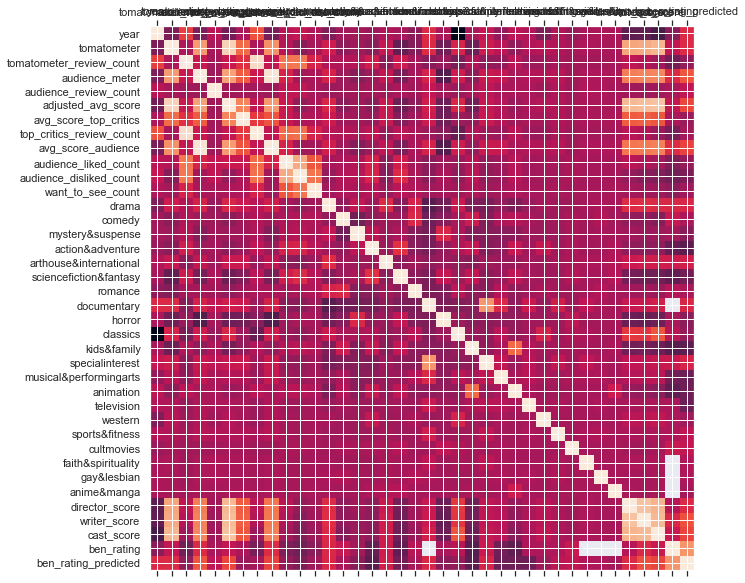

In [204]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(df_with_personal_ratings)

In [212]:
corr.fillna(0)

,year,tomatometer,tomatometer_review_count,audience_meter,audience_review_count,adjusted_avg_score,avg_score_top_critics,top_critics_review_count,avg_score_audience,audience_liked_count,audience_disliked_count,want_to_see_count,drama,comedy,mystery&suspense,action&adventure,arthouse&international,sciencefiction&fantasy,romance,documentary,horror,classics,kids&family,specialinterest,musical&performingarts,animation,television,western,sports&fitness,cultmovies,faith&spirituality,gay&lesbian,anime&manga,director_score,writer_score,cast_score,ben_rating,ben_rating_predicted
year,1.000000,-0.178059,0.306842,-0.185140,0.064760,-0.212059,0.022044,0.378688,-0.199749,0.067053,0.113636,0.033840,-0.166282,-0.037508,-0.022576,-0.056489,0.024595,-0.008663,-0.107488,0.228651,0.009914,-0.726493,0.000900,0.114083,-0.083987,0.076849,0.022996,-0.162064,0.040505,-0.070189,-0.004581,0.006389,0.009528,-0.299240,-0.294056,-0.399479,-0.126572,0.225701
tomatometer,-0.178059,1.000000,0.021576,0.643257,-0.001794,0.890451,0.466482,0.010604,0.606149,0.048585,-0.129372,-0.015684,0.151488,-0.108619,-0.041419,-0.112988,0.123080,-0.281250,-0.145002,0.224431,-0.217349,0.193296,-0.231600,0.148298,0.065246,-0.087369,0.028101,0.056651,0.034537,-0.013889,0.016617,0.000405,0.001711,0.691713,0.713801,0.761553,0.096671,0.231404
tomatometer_review_count,0.306842,0.021576,1.000000,0.128146,-0.029935,0.126574,0.247199,0.926795,0.102386,0.506862,0.513254,0.196472,0.039347,0.028587,0.054354,0.157562,-0.111824,0.147022,-0.012247,-0.137416,-0.068254,-0.200362,0.032304,-0.095890,-0.079210,0.070147,-0.064657,-0.043743,-0.017470,-0.026527,-0.026333,-0.025278,-0.014324,0.088028,0.046696,-0.033257,-0.220039,-0.087645
audience_meter,-0.185140,0.643257,0.128146,1.000000,-0.045254,0.677753,0.406995,0.132135,0.970563,0.191165,-0.020579,0.013608,0.177799,-0.041514,-0.134682,-0.050891,0.107687,-0.195350,-0.015399,0.188647,-0.347144,0.154694,-0.096743,0.136029,0.108535,-0.004333,0.026986,0.039981,0.059502,-0.031650,0.017091,0.017019,0.014642,0.532231,0.548751,0.571426,0.226505,0.392461
audience_review_count,0.064760,-0.001794,-0.029935,-0.045254,1.000000,-0.027433,-0.020262,-0.018566,-0.040134,0.108293,0.093966,-0.003148,-0.054211,-0.040060,-0.025728,-0.008058,-0.035879,0.007003,-0.029015,0.101678,-0.020015,-0.052657,0.002740,0.085530,0.007896,0.003585,0.015106,-0.029015,0.024934,-0.037726,0.033586,0.015902,-0.010062,-0.034870,-0.048873,-0.029425,-0.003072,0.087210
adjusted_avg_score,-0.212059,0.890451,0.126574,0.677753,-0.027433,1.000000,0.556279,0.109065,0.643643,0.131200,-0.090298,0.004791,0.202726,-0.116260,-0.040958,-0.114469,0.127989,-0.239296,-0.105197,0.168855,-0.228354,0.206117,-0.204186,0.122507,0.045925,-0.064035,0.015002,0.048451,0.023773,-0.014777,0.005557,-0.001249,0.000711,0.772508,0.793243,0.814345,0.104523,0.335425
avg_score_top_critics,0.022044,0.466482,0.247199,0.406995,-0.020262,0.556279,1.000000,0.290691,0.381479,0.128696,0.024265,0.028236,0.141275,-0.030297,-0.035595,-0.064304,0.124944,-0.142498,-0.033295,0.138191,-0.217857,-0.045623,-0.090843,0.131851,0.039939,-0.026295,-0.001141,-0.014281,0.024736,-0.016021,0.006626,0.001228,0.011877,0.412484,0.421187,0.390001,0.008666,-0.063890
top_critics_review_count,0.378688,0.010604,0.926795,0.132135,-0.018566,0.109065,0.290691,1.000000,0.101570,0.463461,0.485094,0.190158,0.056302,0.040481,0.022055,0.092266,-0.062980,0.075329,0.011751,-0.045970,-0.137592,-0.265940,0.031363,-0.025686,-0.055343,0.062825,-0.059145,-0.062297,0.005336,-0.043335,-0.017584,-0.021910,-0.014557,0.074671,0.040606,-0.053522,-0.200348,-0.018392
avg_score_audience,-0.199749,0.606149,0.102386,0.970563,-0.040134,0.643643,0.381479,0.101570,1.000000,0.188569,-0.027949,-0.023577,0.167952,-0.029371,-0.145333,-0.045632,0.089796,-0.184218,0.011947,0.180342,-0.342613,0.155886,-0.068550,0.131043,0.120248,0.008999,0.024984,0.039902,0.058439,-0.025838,0.018604,0.018466,0.015378,0.501601,0.519249,0.543212,0.231655,0.321926
audience_liked_count,0.067053,0.048585,0.5

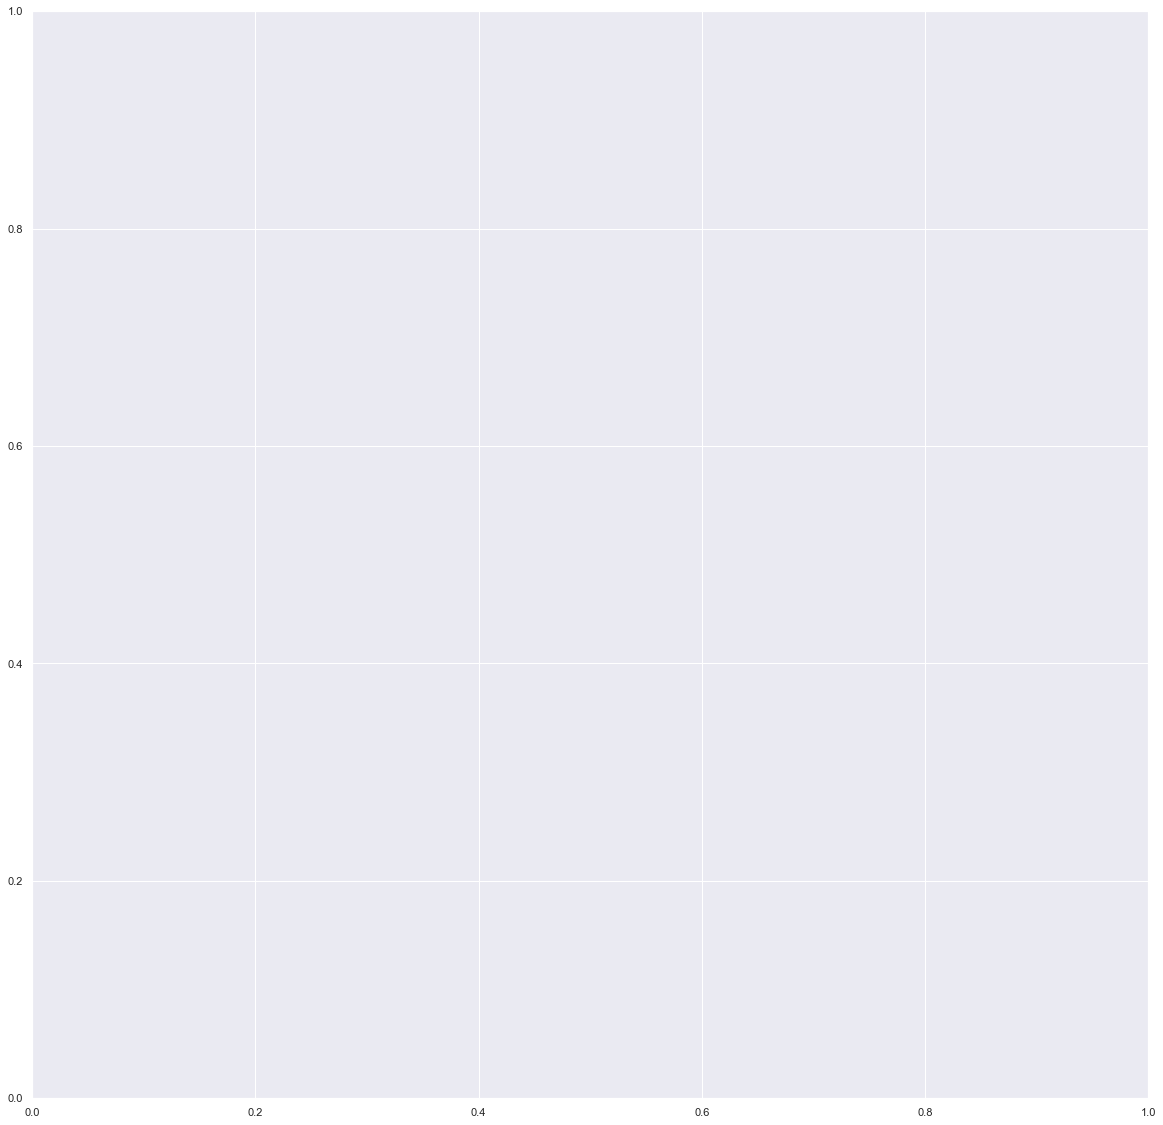

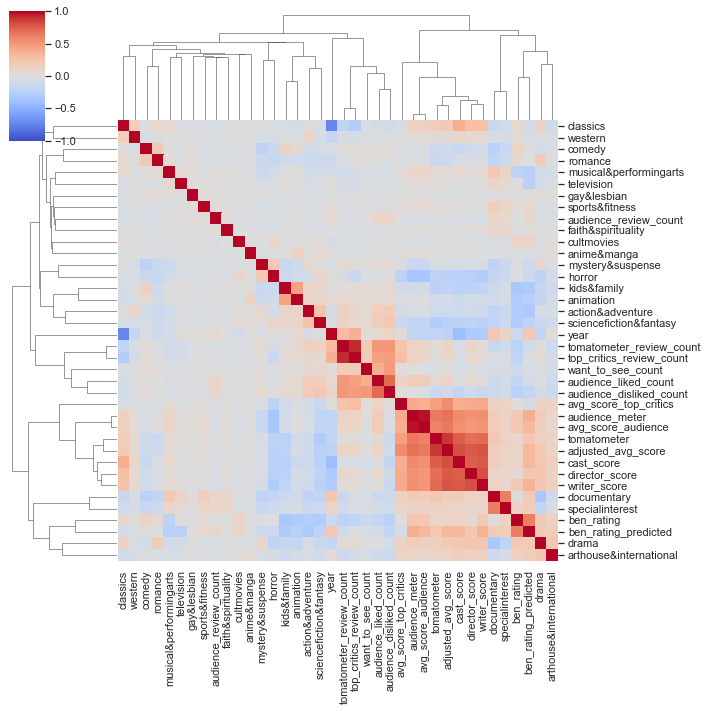

In [214]:
import seaborn as sns
corr = df_with_personal_ratings.corr()
sns.set()
fig, ax1 = plt.subplots(figsize=(20, 20))
sns.clustermap(corr.fillna(0), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, vmin=-1, vmax=1, center=0,cmap='coolwarm')
plt.show()

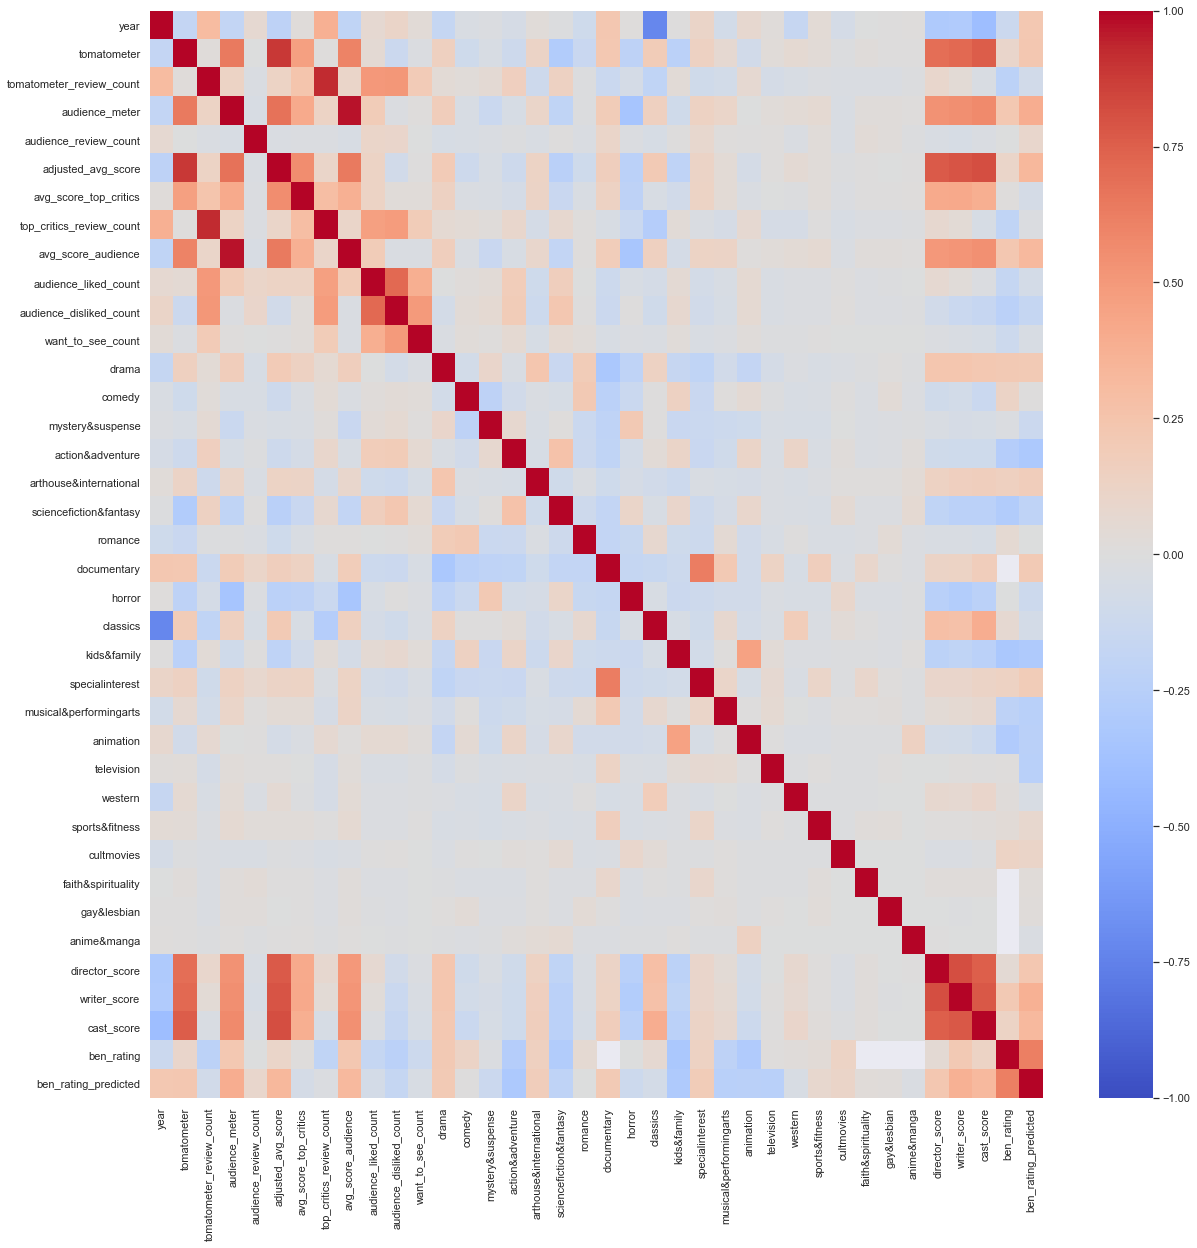

In [209]:
import seaborn as sns
corr = df_with_personal_ratings.corr()
sns.set()
fig, ax1 = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, vmin=-1, vmax=1, center=0,ax=ax1,cmap='coolwarm')
plt.show()

In [202]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df_with_personal_ratings.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

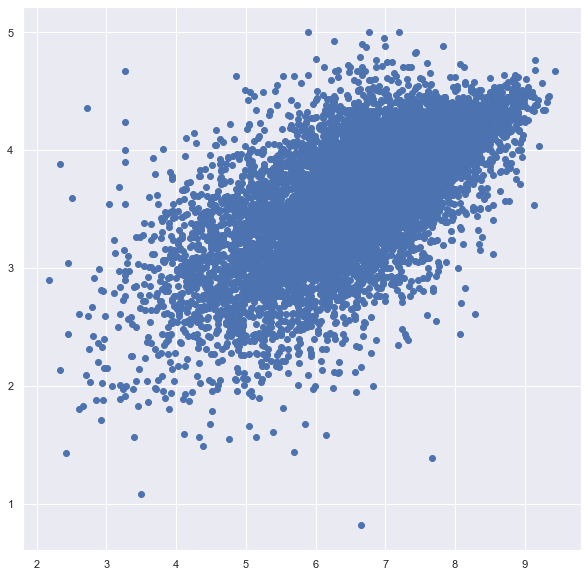

In [200]:
sns.set()
fig, ax1 = plt.subplots(figsize=(10, 10))
ax1.scatter(df_with_personal_ratings['adjusted_avg_score'],df_with_personal_ratings['avg_score_audience'])
plt.show()

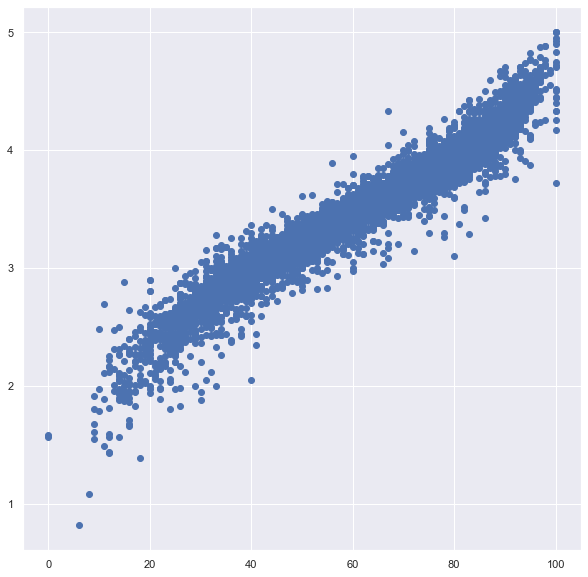

In [199]:
sns.set()
fig, ax1 = plt.subplots(figsize=(10, 10))
ax1.scatter(df_with_personal_ratings['audience_meter'],df_with_personal_ratings['avg_score_audience'])
plt.show()

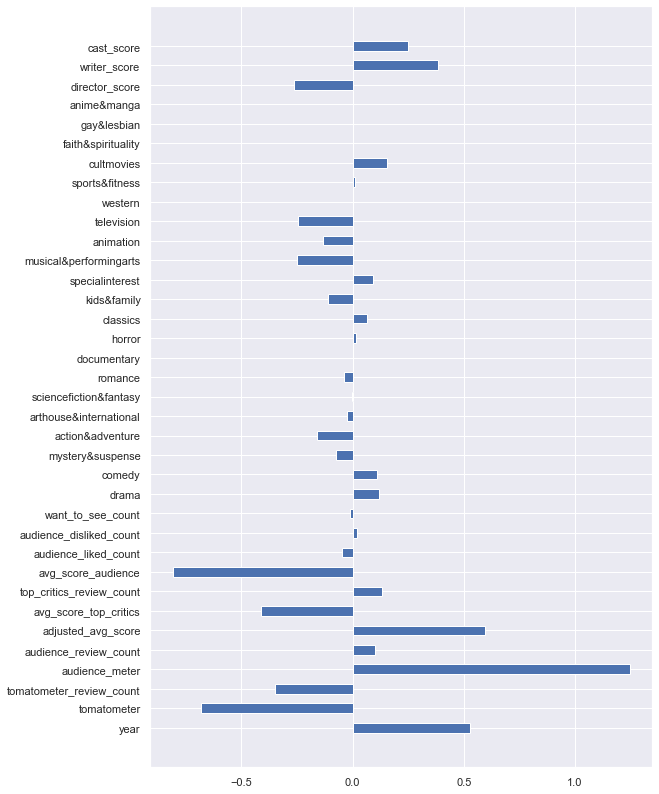

In [196]:
sns.set()
fig, ax1 = plt.subplots(figsize=(9, 14))

pos = np.arange(len(predictor_cols))

rects = ax1.barh(pos, reg.coef_,
                 align='center',
                 height=0.5,
                 tick_label=predictor_cols
                )
plt.show()

In [139]:
df_with_personal_ratings.sort_values('ben_rating_predicted',ascending=False).head(100)

,title,year,tomatometer,tomatometer_review_count,audience_meter,audience_review_count,adjusted_avg_score,avg_score_top_critics,top_critics_review_count,avg_score_audience,audience_liked_count,audience_disliked_count,want_to_see_count,drama,comedy,mystery&suspense,action&adventure,arthouse&international,sciencefiction&fantasy,romance,documentary,horror,classics,kids&family,specialinterest,musical&performingarts,animation,television,western,sports&fitness,cultmovies,faith&spirituality,gay&lesbian,anime&manga,director_score,writer_score,cast_score,ben_rating,ben_rating_predicted
2243,The Pillow Book,-0.001333,-0.276414,-0.075727,0.783518,-0.587523,0.333933,0.753845,0.283849,0.758635,-0.199250,-0.242531,-0.100367,1.002309,-0.645708,-0.508515,-0.506119,2.033149,-0.443133,-0.439559,-0.433474,-0.421524,-0.397846,-0.335358,3.089184,-0.275076,-0.246922,-0.140343,-0.131921,-0.107097,11.736553,-0.067358,-0.05892,-0.039242,0.221026,0.298183,0.104968,NaN,13.184491
9618,Dalida,0.907105,-1.376664,-0.751052,1.151234,-0.246543,0.618630,-2.609654,-0.815576,0.359430,-0.287036,-0.312456,-0.110465,1.002309,-0.645708,-0.508515,-0.506119,-0.491848,-0.443133,2.275009,-0.433474,-0.421524,-0.397846,-0.335358,-0.323710,-0.275076,-0.246922,-0.140343,-0.131921,-0.107097,-0.085204,-0.067358,-0.05892,-0.039242,0.580223,0.614039,0.503952,NaN,13.078720
4597,Clerks,-0.137598,0.654568,-0.089796,1.203765,0.571807,0.772104,0.722326,-0.168855,1.237681,1.909912,0.570539,0.054296,1.002309,1.548687,-0.508515,-0.506119,-0.491848,-0.443133,-0.439559,-0.433474,-0.421524,-0.397846,-0.335358,-0.323710,-0.275076,-0.246922,-0.140343,-0.131921,-0.107097,11.736553,-0.067358,-0.05892,-0.039242,0.425630,0.516580,0.802759,NaN,13.075722
3401,Flesh,0.044089,-0.234096,-0.694775,-0.792404,-0.634407,0.274191,0.204518,-0.815576,-0.598662,-0.282687,-0.295261,-0.109415,1.002309,1.548687,-0.508515,-0.506119,-0.491848,-0.443133,-0.439559,2.306944,-0.421524,2.513536,-0.335358,-0.323710,-0.275076,-0.246922,-0.140343,-0.131921,-0.107097,11.736553,-0.067358,-0.05892,-0.039242,0.260168,0.178021,0.277999,NaN,12.756398
3600,What Ever Happened to Baby Jane?,-1.591099,0.823837,-0.117935,1.361357,-0.502278,1.164501,0.366615,-0.298199,1.337482,-0.055373,-0.243186,-0.083793,1.002309,-0.645708,1.966511,-0.506119,-0.491848,-0.443133,-0.439559,-0.433474,2.372346,2.513536,-0.335358,-0.323710,-0.275076,-0.246922,-0.140343,-0.131921,-0.107097,11.736553,-0.067358,-0.05892,-0.039242,0.640606,0.602496,1.017442,NaN,12.681614
6267,The Deer Hunter,-0.864349,0.866154,0.177520,1.361357,-0.203921,1.741816,1.172593,0.154505,1.457244,0.759446,0.003110,-0.021669,1.002309,-0.645708,-0.508515,-0.506119,-0.491848,-0.443133,-0.439559,-0.433474,-0.421524,-0.397846,-0.335358,-0.323710,-0.275076,-0.246922,-0.140343,-0.131921,-0.107097,11.736553,-0.067358,-0.05892,-0.039242,0.855832,0.842925,1.117350,NaN,12.603160
1056,Badlands,-1.046036,1.077741,-0.033519,1.256295,-0.532114,2.033830,1.334690,-0.298199,1.277602,-0.014480,-0.218622,-0.082944,1.002309,-0.645708,1.966511,1.975820,-0.491848,-0.443133,-0.439559,-0.433474,-0.421524,2.513536,-0.335358,-0.323710,-0.275076,-0.246922,-0.140343,-0.131921,-0.107097,11.736553,-0.067358,-0.05892,-0.039242,0.896199,1.002110,1.606364,NaN,12.518141
9672,Beautiful Something,0.861683,-0.657270,-0.722913,-0.949997,-0.297690,1.848639,-2.609654,-0.750904,-0.957947,-0.287186,-0.308690,-0.110589,1.002309,-0.645708,-0.508515,-0.506119,-0.491848,-0.443133,2.275009,-0.433474,-0.421524,-0.397846,-0.335358,-0.323710,-0.275076,-0.246922,-0.140343,-0.131921,-0.107097,-0.085204,-0.067358,-0.05892,-0.039242,1.605871,1.633048,2.229400,NaN,12.382869
3277,Night of the Living Dead,-1.318567,1.035423,0.107173,1.098703,-0.088840,2.033964,1.330187,-0.298199,1.217721,0.540832,0.075328,-0.034542,-0.997696,-0.645708,-0.508515,-0.506119,-0.491848,-0.443133,-0.439559,-0.433474,2.372346,2.513536,-0.335358,-0.323710,-0.275076,-0.246922,-0.140343,-0.131921,-0.107097,11.736553,-0.067358,-0.05892,-0.039242,-0.534655,-0.08238

In [140]:
df_with_personal_ratings.sort_values('adjusted_avg_score',ascending=False).head(100)

,title,year,tomatometer,tomatometer_review_count,audience_meter,audience_review_count,adjusted_avg_score,avg_score_top_critics,top_critics_review_count,avg_score_audience,audience_liked_count,audience_disliked_count,want_to_see_count,drama,comedy,mystery&suspense,action&adventure,arthouse&international,sciencefiction&fantasy,romance,documentary,horror,classics,kids&family,specialinterest,musical&performingarts,animation,television,western,sports&fitness,cultmovies,faith&spirituality,gay&lesbian,anime&manga,director_score,writer_score,cast_score,ben_rating,ben_rating_predicted
6235,"The Godfather, Part II",-1.046036,1.035423,0.290074,1.624011,1.108849,2.667046,1.766947,0.154505,2.135893,3.932788,0.077293,0.227118,1.002309,-0.645708,1.966511,-0.506119,-0.491848,-0.443133,-0.439559,-0.433474,-0.421524,-0.397846,-0.335358,-0.323710,-0.275076,-0.246922,-0.140343,-0.131921,-0.107097,-0.085204,-0.067358,-0.05892,-0.039242,0.897880,2.440896,2.002854,NaN,9.383165
2565,Tokyo Story (Tky monogatari),-1.999895,1.162375,-0.188281,1.413888,-0.596047,2.584355,1.802968,-0.233527,1.716727,-0.133510,-0.273973,-0.097463,1.002309,-0.645708,-0.508515,-0.506119,2.033149,-0.443133,-0.439559,-0.433474,-0.421524,-0.397846,-0.335358,-0.323710,-0.275076,-0.246922,-0.140343,-0.131921,-0.107097,-0.085204,-0.067358,-0.05892,-0.039242,2.792924,3.389094,2.662833,NaN,9.034271
2348,Parasite (Gisaengchung),0.997948,1.120058,5.242455,1.256295,-0.613096,2.576177,1.613856,2.224011,1.696767,0.625968,-0.002622,-0.442218,1.002309,-0.645708,-0.508515,-0.506119,2.033149,-0.443133,-0.439559,-0.433474,-0.421524,-0.397846,-0.335358,-0.323710,-0.275076,-0.246922,-0.140343,-0.131921,-0.107097,-0.085204,-0.067358,-0.05892,-0.039242,2.004687,1.729940,2.031971,NaN,8.482806
3816,Citizen Kane,-2.544958,1.162375,0.374489,1.256295,0.034764,2.556123,1.564326,0.413193,1.616926,1.397444,0.280356,0.040837,1.002309,-0.645708,1.966511,-0.506119,-0.491848,-0.443133,-0.439559,-0.433474,-0.421524,2.513536,-0.335358,-0.323710,-0.275076,-0.246922,-0.140343,-0.131921,-0.107097,-0.085204,-0.067358,-0.05892,-0.039242,2.439097,2.679214,2.411289,NaN,8.648040
3249,The Wizard of Oz,-2.635802,1.077741,0.810637,1.203765,3.090791,2.532997,1.577834,1.059914,1.477204,2.050440,0.638991,0.050147,-0.997696,-0.645708,-0.508515,-0.506119,-0.491848,2.256658,-0.439559,-0.433474,-0.421524,2.513536,2.981884,-0.323710,3.635361,-0.246922,-0.140343,-0.131921,-0.107097,-0.085204,-0.067358,-0.05892,-0.039242,1.579880,1.421404,1.458566,5.0,4.408659
2060,The Rules of the Game (La rgle du jeu),-2.136161,0.993106,-0.117935,1.256295,-0.600309,2.501433,1.573332,-0.039511,1.477204,-0.168455,-0.267913,-0.102270,1.002309,1.548687,-0.508515,-0.506119,2.033149,-0.443133,-0.439559,-0.433474,-0.421524,-0.397846,-0.335358,-0.323710,-0.275076,-0.246922,-0.140343,-0.131921,-0.107097,-0.085204,-0.067358,-0.05892,-0.039242,2.257154,1.769065,2.265883,NaN,8.707191
3292,Casablanca,-2.499536,1.077741,0.430766,1.518949,0.878688,2.492533,1.636369,0.542538,1.936290,2.563058,0.164905,0.216606,1.002309,-0.645708,-0.508515,-0.506119,-0.491848,-0.443133,2.275009,-0.433474,-0.421524,2.513536,-0.335358,-0.323710,-0.275076,-0.246922,-0.140343,-0.131921,-0.107097,-0.085204,-0.067358,-0.05892,-0.039242,1.555090,1.474202,3.176613,NaN,8.953760
6646,Boyhood,0.770839,1.035423,3.596351,0.730988,-0.263592,2.446742,1.699407,3.517452,0.858436,1.225822,0.889872,0.121386,1.002309,-0.645708,-0.508515,-0.506119,-0.491848,-0.443133,-0.439559,-0.433474,-0.421524,-0.397846,-0.335358,-0.323710,-0.275076,-0.246922,-0.140343,-0.131921,-0.107097,-0.085204,-0.067358,-0.05892,-0.039242,1.909003,2.635246,1.400527,NaN,8.948183
1038,Sherlock Jr.,-3.317130,0.950789,-0.511874,1.518949,-0.617358,2.435069,-2.609654,-0.492215,1.636886,-0.200200,-0.297718,-0.107302,-0.997696,1.548687,-0.508515,1.975820,-0.491848,2.256658,-0.439559,-0.433474,-0.421524,2.513536,2.981884,-0.323710,-0.275076,-0.246922,-0.140343,-0.131921,-0.107097,-0.085204,-0.067358,-0.05892,-0.039242,2.911990,3.4177

In [143]:
df_with_personal_ratings.loc[~df_with_personal_ratings.ben_rating.isna(),['title','ben_rating','ben_rating_predicted']]

,title,ben_rating,ben_rating_predicted
3249,The Wizard of Oz,5.0,4.408659
8008,E.T. The Extra-Terrestrial,6.0,5.941189
3905,2001: A Space Odyssey,10.0,8.944137
989,Raiders of the Lost Ark,6.0,7.717606
6486,Pulp Fiction,10.0,7.996662
...,...,...,...
9593,The Twilight Saga: Breaking Dawn Part 2,4.0,5.839040
7145,The Rocky Horror Picture Show: Let's Do the Ti...,4.0,5.127689
9126,St. Elmo's Fire,9.0,7.641166
10217,RocketMan,8.0,7.542594


In [125]:
df_with_scores['title'].apply(lambda x: x.lower())

0                            outside the law (hors-la-loi)
1              tinkerbell and the legend of the neverbeast
2        aguirre, the wrath of god (aguirre, der zorn g...
3                                              baby driver
4              dcu: justice league: the flashpoint paradox
                               ...                        
16751    lawnmower man 2 - jobe's war (lawnmower man 2:...
16753                                   the age of adaline
16755                                    the fifth element
16758                                                   io
16764                                       the terminator
Name: title, Length: 10406, dtype: object

In [165]:
df_with_scores[df_with_scores.title.str.contains('Lon: The Professional')]

,level_0,index,description,rating,director1,director2,director3,writer1,writer2,writer3,writer4,releasedate,streamdate,runtime,studio,cast1,cast2,cast3,cast4,cast5,cast6,title,year,critics_consensus,genre,tomatometer,tomatometer_review_count,audience_meter,audience_review_count,js_dump_index,avg_score,avg_score_top_critics,top_critics_review_count,avg_score_audience,audience_liked_count,audience_disliked_count,want_to_see_count,pageLink,drama,comedy,mystery&suspense,action&adventure,arthouse&international,sciencefiction&fantasy,romance,documentary,horror,classics,kids&family,specialinterest,musical&performingarts,animation,television,western,sports&fitness,cultmovies,faith&spirituality,gay&lesbian,anime&manga,director1_director_score,director2_director_score,director3_director_score,director_score,writer1_writer_score,writer2_writer_score,writer3_writer_score,writer4_writer_score,writer_score,cast1_cast_score,cast2_cast_score,cast3_cast_score,cast4_cast_score,cast5_cast_score,cast6_cast_score,cast_score
8450,12193,372,As visually stylish as it is graphically viole...,"R (for scenes of strong graphic violence, and ...",Luc Besson,NaN,NaN,Luc Besson,NaN,NaN,NaN,"Nov 18, 1994","Aug 15, 2000",104 minutes,Columbia Pictures,Jean Reno,Gary Oldman,Natalie Portman,Danny Aiello,Peter Appel,Michael Badalucco,Lon: The Professional,NaN,Pivoting on the unusual relationship between s...,"Action & Adventure, Drama, Mystery & Suspense",73.0,64.0,95.0,274.0,137878.0,6.85,5.54,18.0,4.41,51685.0,2780.0,27051.0,https://www.rottentomatoes.com/m/leon_the_prof...,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.107534,NaN,NaN,6.107534,6.033828,NaN,NaN,NaN,6.033828,5.959927,6.589617,6.375605,6.675355,6.589843,6.646986,6.472889


In [14]:
df_clean.cast6.value_counts()

Tony Shalhoub       15
Albert Basserman    15
Michael Gambon      14
Wallace Shawn       13
Emma Thompson       11
                    ..
Adam Godley          1
Tina Benko           1
James Gleason        1
Maureen Keiller      1
Dolly Haas           1
Name: cast6, Length: 7908, dtype: int64

'\n                After losing their family home in Algeria, three brothers are scattered across the globe. Messaoud joins the French army fighting in Indochina; Abdelkader becomes a leader of the Algerian independence movement; Sad moves to Paris to make his fortune in the shady clubs and boxing halls of Pigalle. Gradually, their interconnecting destinies reunite them in the French capital, where freedom is a battle to be fought and won.-- (C) Official Site\n            '

'                after losing their family home in algeria three brothers are scattered across the globe messaoud joins the french army fighting in indochina abdelkader becomes a leader of the algerian independence movement sad moves to paris to make his fortune in the shady clubs and boxing halls of pigalle gradually their interconnecting destinies reunite them in the french capital where freedom is a battle to be fought and won c official site            '

## Old code

In [71]:
path = r'D:/Documents/DataScience/Portfolio/films/films/'
df_personal_ratings = pd.read_csv(os.path.join(path, 'films_list_working_film_list'+r'.csv'))
df_personal_ratings['film_title'] = df_personal_ratings['Film']
# Removing the year in brackets after film title, however this means any film titles that actually include brackets won't match
df_personal_ratings['film_title'] = df_personal_ratings['film_title'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x).rstrip())
df_personal_ratings['is_in_main_db'] = df_personal_ratings['film_title']\
    .apply(lambda x: any(df_with_scores['title'].apply(lambda x: x.lower()).eq(x.lower())))

df_personal_ratings['best_match_ratio'] = np.nan
df_personal_ratings['best_match_title'] = np.nan
for idx, row in df_personal_ratings.iterrows():
    film_title = row['film_title']
    #print(film_title)
    ratios = df_with_scores['title'].apply(lambda y: fuzz.ratio(film_title.lower(), y.lower()))
    #ratios = df_with_scores['title'].apply(lambda y: fuzz.token_set_ratio(film_title.lower(), y.lower()))
    max_ratio = max(ratios)
    best_title_match = df_with_scores.loc[np.argmax(ratios),'title']
    df_personal_ratings.loc[idx,'best_match_ratio'] = max_ratio
    df_personal_ratings.loc[idx,'best_match_title'] = best_title_match
df_personal_ratings = df_personal_ratings[df_personal_ratings.best_match_ratio >= 85]
df_personal_ratings = df_personal_ratings[~df_personal_ratings.film_title.isin(['City of God'])]

KeyboardInterrupt: 